<h1><b>FINAL PROJECT UJIAN AKHIR SEMESTER GENAP</b></h1>

<h2><b>Big Data And Predictive Analytics</b></h2>

<h5>Anggota Kelompok :</h5>
<ol>
    <li><p>Haikal Raditya Fadhilah (21.11.3910) </p></li>
    <li><p>Wulan Kristiyanti (21.11.3924) </p></li>
    <li><p>Widdia Glory Anggrenny (21.11.3936) </p></li>
    <li><p>Gilang Ramadhani (21.11.3946) </p></li>
</ol>


<h2><b>IMPORT LIBRARY</b></h2>

In [5]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from scipy import stats
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error,mean_squared_error
from sklearn.model_selection import train_test_split

<h2><b>IMPORT DATASET</b></h2>


In [6]:
df = pd.read_csv('./DATASET/CO2 Emissions_Canada.csv')
df

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244
...,...,...,...,...,...,...,...,...,...,...,...,...
7380,VOLVO,XC40 T5 AWD,SUV - SMALL,2.0,4,AS8,Z,10.7,7.7,9.4,30,219
7381,VOLVO,XC60 T5 AWD,SUV - SMALL,2.0,4,AS8,Z,11.2,8.3,9.9,29,232
7382,VOLVO,XC60 T6 AWD,SUV - SMALL,2.0,4,AS8,Z,11.7,8.6,10.3,27,240
7383,VOLVO,XC90 T5 AWD,SUV - STANDARD,2.0,4,AS8,Z,11.2,8.3,9.9,29,232


<h3><b>MEMPERSIAPKAN DATA</b></h3>
<p><b>1) Melihat Jumlah Baris Dan Column Dataset</b></p>

In [7]:
df.shape

(7385, 12)

<p><b>2) Melihat tipe data tiap kolom dari dataset</b></p>

In [8]:
df.dtypes

Make                                 object
Model                                object
Vehicle Class                        object
Engine Size(L)                      float64
Cylinders                             int64
Transmission                         object
Fuel Type                            object
Fuel Consumption City (L/100 km)    float64
Fuel Consumption Hwy (L/100 km)     float64
Fuel Consumption Comb (L/100 km)    float64
Fuel Consumption Comb (mpg)           int64
CO2 Emissions(g/km)                   int64
dtype: object

<p><b>3 Melihat data kolom apakah ada yang terdapat data kosong (NA) dan menghitung serta membersihkan data NULL</b></p>

In [9]:
df.isna()

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
7380,False,False,False,False,False,False,False,False,False,False,False,False
7381,False,False,False,False,False,False,False,False,False,False,False,False
7382,False,False,False,False,False,False,False,False,False,False,False,False
7383,False,False,False,False,False,False,False,False,False,False,False,False


<p><b>4 Melihat Jumlah Data Yang Kosong Atau NA</b></p>

In [10]:
df.isna().sum()

Make                                0
Model                               0
Vehicle Class                       0
Engine Size(L)                      0
Cylinders                           0
Transmission                        0
Fuel Type                           0
Fuel Consumption City (L/100 km)    0
Fuel Consumption Hwy (L/100 km)     0
Fuel Consumption Comb (L/100 km)    0
Fuel Consumption Comb (mpg)         0
CO2 Emissions(g/km)                 0
dtype: int64

<h3><b>EDA (Exploratory Data Analytics)</b></h3>
<p><b>1.Print DataFrame</b></p>

In [11]:
df

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244
...,...,...,...,...,...,...,...,...,...,...,...,...
7380,VOLVO,XC40 T5 AWD,SUV - SMALL,2.0,4,AS8,Z,10.7,7.7,9.4,30,219
7381,VOLVO,XC60 T5 AWD,SUV - SMALL,2.0,4,AS8,Z,11.2,8.3,9.9,29,232
7382,VOLVO,XC60 T6 AWD,SUV - SMALL,2.0,4,AS8,Z,11.7,8.6,10.3,27,240
7383,VOLVO,XC90 T5 AWD,SUV - STANDARD,2.0,4,AS8,Z,11.2,8.3,9.9,29,232


<p><b>2.Melihat 10 Data Teratas</b></p>

In [12]:
df.head(10)

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244
5,ACURA,RLX,MID-SIZE,3.5,6,AS6,Z,11.9,7.7,10.0,28,230
6,ACURA,TL,MID-SIZE,3.5,6,AS6,Z,11.8,8.1,10.1,28,232
7,ACURA,TL AWD,MID-SIZE,3.7,6,AS6,Z,12.8,9.0,11.1,25,255
8,ACURA,TL AWD,MID-SIZE,3.7,6,M6,Z,13.4,9.5,11.6,24,267
9,ACURA,TSX,COMPACT,2.4,4,AS5,Z,10.6,7.5,9.2,31,212


<p><b>3.Melihat 10 Data Terakhir</b></p>

In [13]:
df.tail(10)

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
7375,VOLVO,S90 T6 AWD,MID-SIZE,2.0,4,AS8,Z,11.3,7.5,9.6,29,223
7376,VOLVO,V60 T5,STATION WAGON - SMALL,2.0,4,AS8,Z,10.5,7.1,8.9,32,208
7377,VOLVO,V60 T6 AWD,STATION WAGON - SMALL,2.0,4,AS8,Z,11.0,7.4,9.4,30,219
7378,VOLVO,V60 CC T5 AWD,STATION WAGON - SMALL,2.0,4,AS8,Z,10.8,7.7,9.4,30,220
7379,VOLVO,XC40 T4 AWD,SUV - SMALL,2.0,4,AS8,X,10.2,7.5,9.0,31,210
7380,VOLVO,XC40 T5 AWD,SUV - SMALL,2.0,4,AS8,Z,10.7,7.7,9.4,30,219
7381,VOLVO,XC60 T5 AWD,SUV - SMALL,2.0,4,AS8,Z,11.2,8.3,9.9,29,232
7382,VOLVO,XC60 T6 AWD,SUV - SMALL,2.0,4,AS8,Z,11.7,8.6,10.3,27,240
7383,VOLVO,XC90 T5 AWD,SUV - STANDARD,2.0,4,AS8,Z,11.2,8.3,9.9,29,232
7384,VOLVO,XC90 T6 AWD,SUV - STANDARD,2.0,4,AS8,Z,12.2,8.7,10.7,26,248


<p><b>3.Melihat Nama-nama Column Dari Dataset</b></p>

In [14]:
df.columns  

Index(['Make', 'Model', 'Vehicle Class', 'Engine Size(L)', 'Cylinders',
       'Transmission', 'Fuel Type', 'Fuel Consumption City (L/100 km)',
       'Fuel Consumption Hwy (L/100 km)', 'Fuel Consumption Comb (L/100 km)',
       'Fuel Consumption Comb (mpg)', 'CO2 Emissions(g/km)'],
      dtype='object')

<p><b>4.Melihat Informasi column dataset</b></p>

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7385 entries, 0 to 7384
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Make                              7385 non-null   object 
 1   Model                             7385 non-null   object 
 2   Vehicle Class                     7385 non-null   object 
 3   Engine Size(L)                    7385 non-null   float64
 4   Cylinders                         7385 non-null   int64  
 5   Transmission                      7385 non-null   object 
 6   Fuel Type                         7385 non-null   object 
 7   Fuel Consumption City (L/100 km)  7385 non-null   float64
 8   Fuel Consumption Hwy (L/100 km)   7385 non-null   float64
 9   Fuel Consumption Comb (L/100 km)  7385 non-null   float64
 10  Fuel Consumption Comb (mpg)       7385 non-null   int64  
 11  CO2 Emissions(g/km)               7385 non-null   int64  
dtypes: flo

<p><b>5.Melihat deskripsi dari dataset</b></p>

In [16]:
df.describe()

,Engine Size(L),Cylinders,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
count,7385.000000,7385.000000,7385.000000,7385.000000,7385.000000,7385.000000,7385.000000
mean,3.160068,5.615030,12.556534,9.041706,10.975071,27.481652,250.584699
std,1.354170,1.828307,3.500274,2.224456,2.892506,7.231879,58.512679
min,0.900000,3.000000,4.200000,4.000000,4.100000,11.000000,96.000000
25%,2.000000,4.000000,10.100000,7.500000,8.900000,22.000000,208.000000
50%,3.000000,6.000000,12.100000,8.700000,10.600000,27.000000,246.000000
75%,3.700000,6.000000,14.600000,10.200000,12.600000,32.000000,288.000000
max,8.400000,16.000000,30.600000,20.600000,26.100000,69.000000,522.000000


<p><b>6 Membersihkan Data Outliers</b></p>

In [17]:
#Membuat Fungsi Untuk Membersihkan Outliers
def clear_outliers (dataset,kolom):
    Q1 = dataset[kolom].quantile(0.25)
    Q3 = dataset[kolom].quantile(0.75)
    IQR = Q3 - Q1
    min_iqr = Q1 - 1.5 * IQR;
    max_iqr = Q3 + 1.5 * IQR;
    return dataset.loc[(dataset[kolom] >= min_iqr) & (dataset[kolom] <= max_iqr)].reset_index(drop=True)

In [18]:
# Mengurutkan Data Berdasarkan Kolom Harga Secara Ascending Serta Mereset Index
df.sort_values('CO2 Emissions(g/km)',ascending=True,inplace=True)
df.reset_index(inplace=True,drop=True)
df

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,HYUNDAI,IONIQ Blue,FULL-SIZE,1.6,4,AM6,X,4.2,4.0,4.1,69,96
1,HYUNDAI,IONIQ Blue,FULL-SIZE,1.6,4,AM6,X,4.2,4.0,4.1,69,96
2,HYUNDAI,IONIQ BLUE,FULL-SIZE,1.6,4,AM6,X,4.2,4.0,4.1,69,96
3,HYUNDAI,IONIQ BLUE,FULL-SIZE,1.6,4,AM6,X,4.2,4.0,4.1,69,96
4,HYUNDAI,IONIQ,FULL-SIZE,1.6,4,AM6,X,4.2,4.2,4.2,67,99
...,...,...,...,...,...,...,...,...,...,...,...,...
7380,LAMBORGHINI,Aventador Roadster,TWO-SEATER,6.5,12,AM7,Z,26.6,15.8,21.7,13,493
7381,LAMBORGHINI,Aventador Roadster,TWO-SEATER,6.5,12,AM7,Z,26.6,15.8,21.7,13,493
7382,BUGATTI,Chiron,TWO-SEATER,8.0,16,AM7,Z,26.8,16.6,22.2,13,522
7383,BUGATTI,Chiron,TWO-SEATER,8.0,16,AM7,Z,26.8,16.6,22.2,13,522


<p><b>7 Melihat Deskripsi Data Setelah Di Bersihkan Dari Data Outliers</b></p>

In [19]:
df.describe()

,Engine Size(L),Cylinders,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
count,7385.000000,7385.000000,7385.000000,7385.000000,7385.000000,7385.000000,7385.000000
mean,3.160068,5.615030,12.556534,9.041706,10.975071,27.481652,250.584699
std,1.354170,1.828307,3.500274,2.224456,2.892506,7.231879,58.512679
min,0.900000,3.000000,4.200000,4.000000,4.100000,11.000000,96.000000
25%,2.000000,4.000000,10.100000,7.500000,8.900000,22.000000,208.000000
50%,3.000000,6.000000,12.100000,8.700000,10.600000,27.000000,246.000000
75%,3.700000,6.000000,14.600000,10.200000,12.600000,32.000000,288.000000
max,8.400000,16.000000,30.600000,20.600000,26.100000,69.000000,522.000000


<p><b>8 Melihat Korelasi Setiap Variabel</b></p>

In [20]:
df.corr()

/tmp/ipykernel_18366/1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,Engine Size(L),Cylinders,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
Engine Size(L),1.000000,0.927653,0.831379,0.761526,0.817060,-0.757854,0.851145
Cylinders,0.927653,1.000000,0.800702,0.715252,0.780534,-0.719321,0.832644
Fuel Consumption City (L/100 km),0.831379,0.800702,1.000000,0.948180,0.993810,-0.927059,0.919592
Fuel Consumption Hwy (L/100 km),0.761526,0.715252,0.948180,1.000000,0.977299,-0.890638,0.883536
Fuel Consumption Comb (L/100 km),0.817060,0.780534,0.993810,0.977299,1.000000,-0.925576,0.918052
Fuel Consumption Comb (mpg),-0.757854,-0.719321,-0.927059,-0.890638,-0.925576,1.000000,-0.907426
CO2 Emissions(g/km),0.851145,0.832644,0.919592,0.883536,0.918052,-0.907426,1.000000


<h3><b>VISUALIASI DATA</b></h3>


<p><b>1 Melihat Jumlah Data Rumah Berdasarkan Kondisinya</b></p>

In [21]:
# Mengseleksi Data Serta Menghitung Jumlah Data Rumah Berdasarkan Kondisi Rumah
kondisi_rumah = df['condition'].value_counts().rename_axis('kondisi').reset_index(name='jumlah')
numeric_condition = [1,2,3,4,5];
string_condition = ['Sangat Buruk','Buruk','Sedang','Bagus','Sangat Bagus']
kondisi_rumah['kondisi'].replace(numeric_condition,string_condition,inplace=True);

KeyError: 'condition'

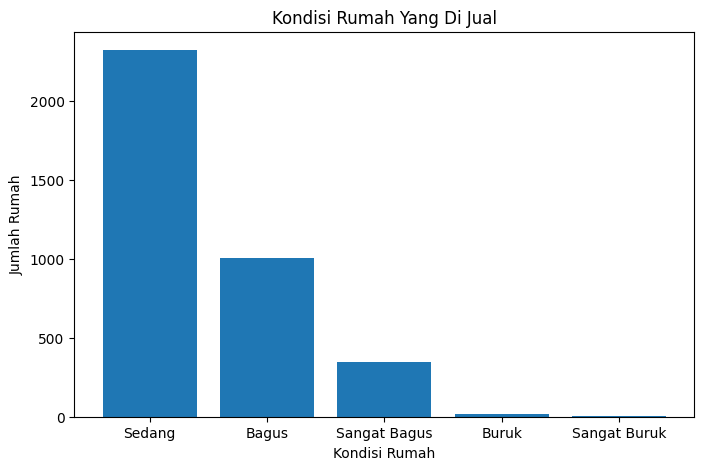

In [ ]:
# Membuat Bar Plot Untuk Mevisualisasikan Jumlah Data Rumah Setiap Kondisi
fig = plt.subplots(figsize=(8,5))
plt.bar(kondisi_rumah['kondisi'],kondisi_rumah['jumlah'],)
plt.title('Kondisi Rumah Yang Di Jual')
plt.ylabel('Jumlah Rumah')
plt.xlabel('Kondisi Rumah')
plt.show()

<p><b>2 Memvisualisasikan Data Harga Minimun Rumah Dari Tahun Ke Tahun</b></p>

In [ ]:
# Mengambil Dan Mengelompokkan Data Harga Dan Ukuran Properti Rumah Minimal Berdasarkan Tahun
tahun_buat = df[['yr_built','sqft_lot','price']].groupby('yr_built',as_index=False).min()

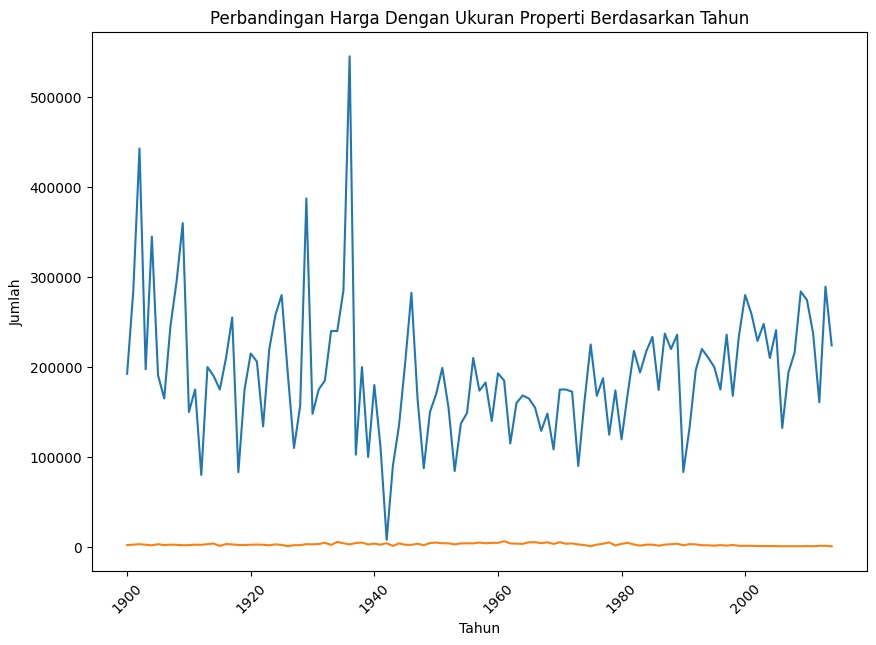

In [ ]:
# Menvisualisasikan Antara Harga Rumah Den Ukuran properti Berdasarkan Tahun Dengan Line Chart
fig,ax = plt.subplots(figsize=(10,7))
ax.plot(tahun_buat['yr_built'],tahun_buat['price']);
ax.plot(tahun_buat['yr_built'],tahun_buat['sqft_lot']);
plt.xticks(rotation=45)
plt.xlabel("Tahun")
plt.ylabel("Jumlah")
plt.title("Perbandingan Harga Dengan Ukuran Properti Berdasarkan Tahun")
plt.show()

<p><b>3 Memvisualisasikan Data Jumlah Rumah Yang Di Bangun Berdasarkan Tahun</b></p>

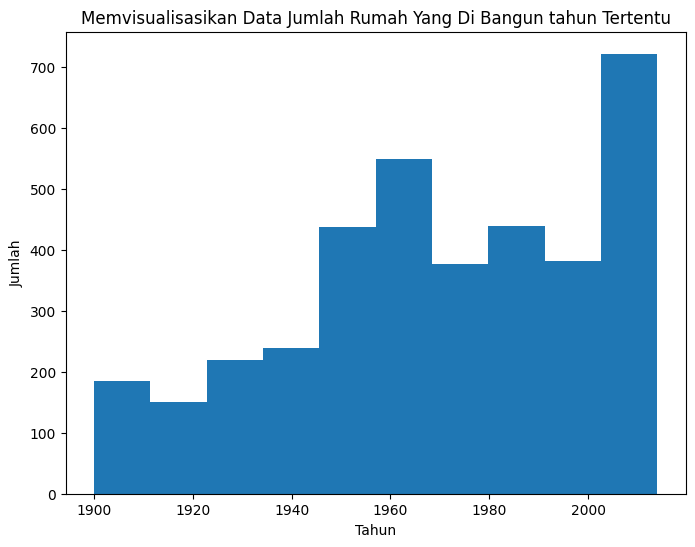

In [ ]:
fig,ax = plt.subplots(figsize=(8,6))
plt.hist(df['yr_built'])
plt.title("Memvisualisasikan Data Jumlah Rumah Yang Di Bangun tahun Tertentu")
plt.xlabel("Tahun")
plt.ylabel("Jumlah")
plt.show()

<p><b>4 Memvisualisasi Jumlah Data Rumah Berdasarkan Square Foot Living,Lot,Above</b></p>

Text(0.5, 1.0, 'Grafik Histogram Kolom Square Foot Above')

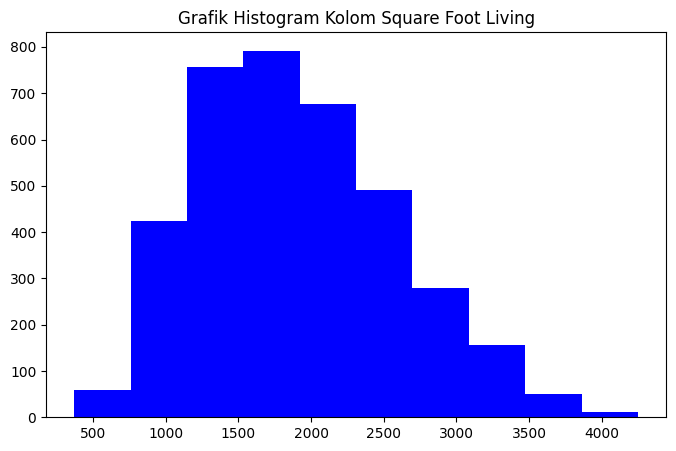

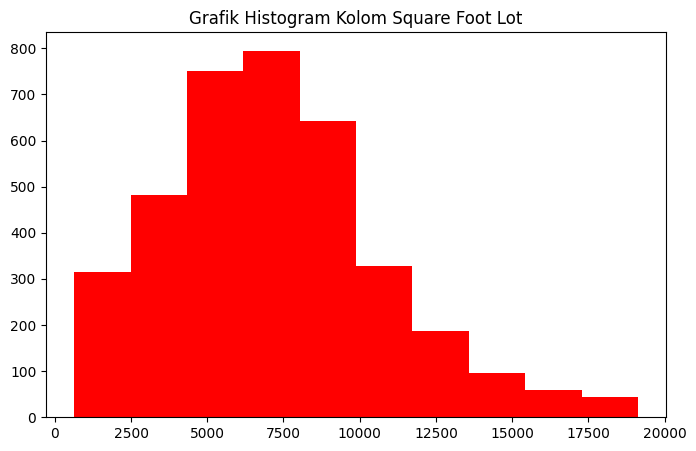

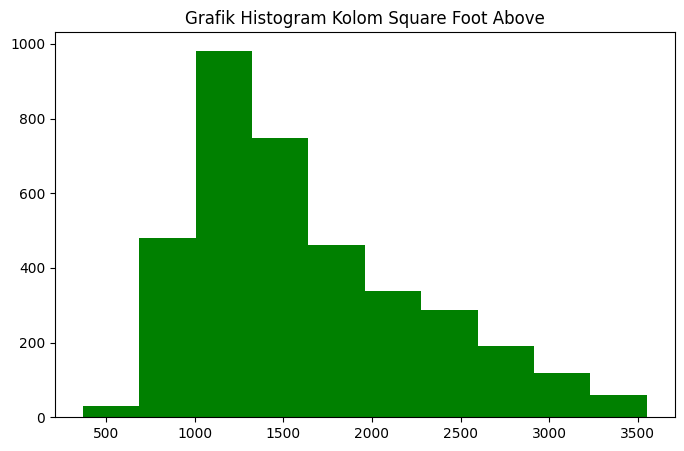

In [ ]:
# Visualisasi Data Kolom Square Living Dengan Histogram
df.hist(column='sqft_living',grid=False, figsize=(8,5),zorder=2,color="b")
plt.title("Grafik Histogram Kolom Square Foot Living")
# Visualisasi Data Kolom Square Lot Dengan Histogram
df.hist(column='sqft_lot',grid=False, figsize=(8,5),zorder=2,color="r")
plt.title("Grafik Histogram Kolom Square Foot Lot")
# Visualisasi Data Kolom Square Above Dengan Histogram
df.hist(column='sqft_above',grid=False, figsize=(8,5),zorder=2,color="g")
plt.title("Grafik Histogram Kolom Square Foot Above")

<p><b>5 Memvisualisasikan Data Kolom Price Dengan Square Foot Living Dan Price Dengan Square Foot Lot</b></p>

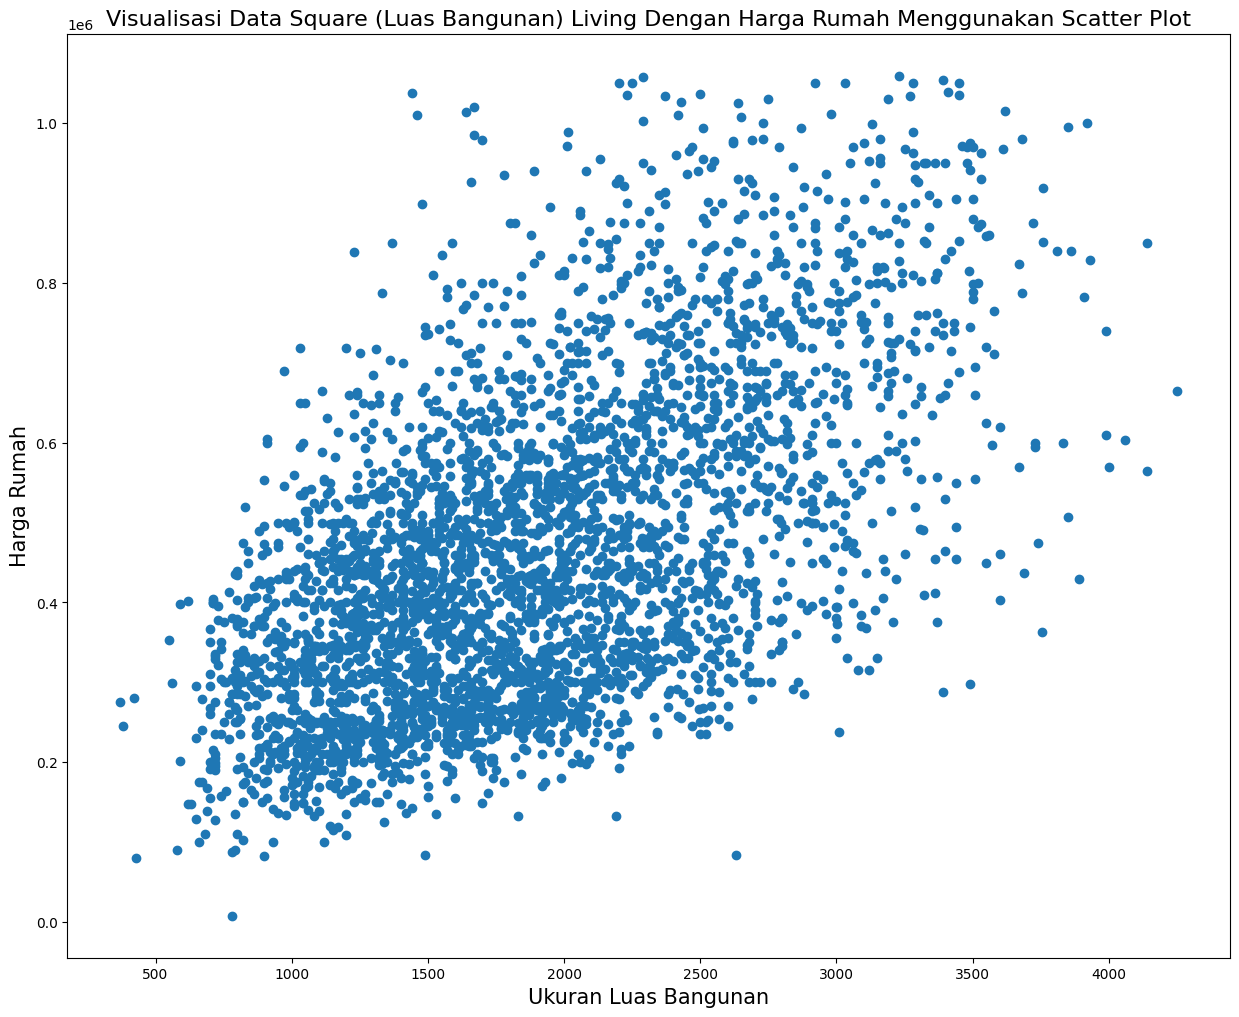

In [ ]:
# Scatter Plot Kolom Square Living Dengan Harga Rumah
fig,ax = plt.subplots(figsize=(15,12))
plt.scatter(df['sqft_living'],df['price'])
plt.title("Visualisasi Data Square (Luas Bangunan) Living Dengan Harga Rumah Menggunakan Scatter Plot",fontsize=16)
plt.xlabel("Ukuran Luas Bangunan", fontsize=15)
plt.ylabel("Harga Rumah",fontsize=15)
plt.show()

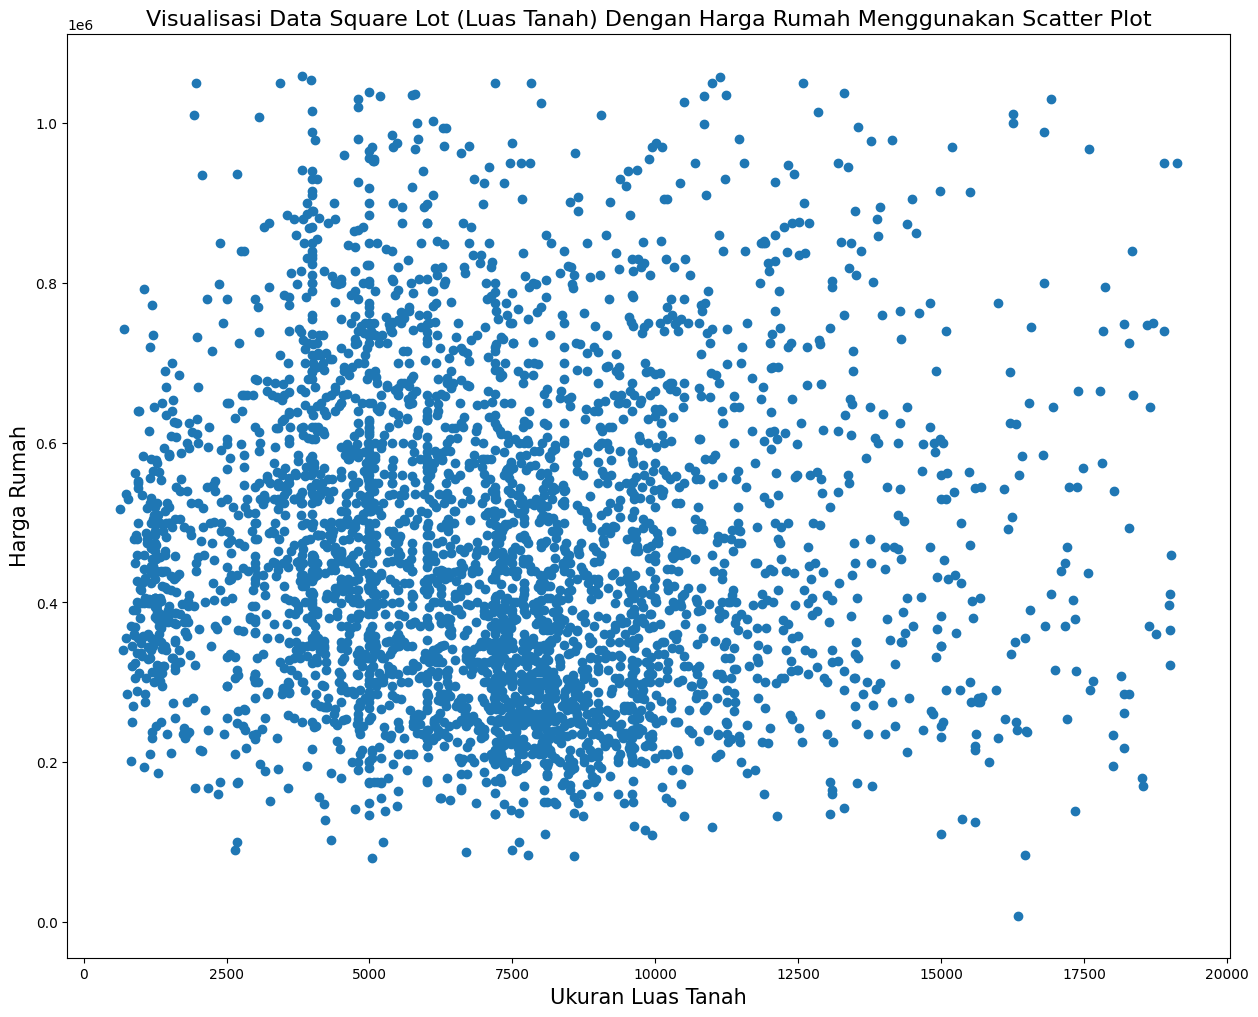

In [ ]:
# Scatter Plot Kolom Square Lot Dengan Harga Rumah
fig,ax = plt.subplots(figsize=(15,12))
plt.scatter(df['sqft_lot'],df['price'])
plt.title("Visualisasi Data Square Lot (Luas Tanah) Dengan Harga Rumah Menggunakan Scatter Plot",fontsize=16)
plt.xlabel("Ukuran Luas Tanah", fontsize=15)
plt.ylabel("Harga Rumah",fontsize=15)
plt.show()

<h3><b>KORELASI VARIABLE</b></h3>


<p><b>1.Melihat korelasi seluruh variabel</b></p>

In [ ]:
df.corr()

/tmp/ipykernel_5080/1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built
price,1.000000,0.278725,0.423044,0.582906,-0.014672,0.243318,0.061270,0.233052,0.075860,0.459256,0.255548,-0.008554
bedrooms,0.278725,1.000000,0.497676,0.624820,0.209819,0.135255,-0.021077,0.058286,0.020762,0.468285,0.311976,0.145564
bathrooms,0.423044,0.497676,1.000000,0.699515,-0.016647,0.501635,0.022598,0.108689,-0.149132,0.612159,0.209877,0.526210
sqft_living,0.582906,0.624820,0.699515,1.000000,0.224737,0.307990,0.027823,0.172807,-0.064778,0.815169,0.395113,0.308506
sqft_lot,-0.014672,0.209819,-0.016647,0.224737,1.000000,-0.337158,0.076301,0.066522,0.115684,0.182637,0.089687,-0.026140
floors,0.243318,0.135255,0.501635,0.307990,-0.337158,1.000000,0.001135,-0.023603,-0.303450,0.535557,-0.329508,0.501368
waterfront,0.061270,-0.021077,0.022598,0.027823,0.076301,0.001135,1.000000,0.223877,0.026851,-0.000949,0.048469,0.003959
view,0.233052,0.058286,0.108689,0.172807,0.066522,-0.023603,0.223877,1.000000,0.047740,0.041042,0.226598,-0.075146
condition,0.075860,0.020762,-0.149132,-0.064778,0.115684,-0.303450,0.026851,0.047740,1.000000,-0.211293,0.225763,-0.407354
sqft_above,0.459256,0.468285,0.612159,0.815169,0.182637,0.535557,-0.000949,0.041042,-0.211293,1.000000,-0.210010,0.459526


<p><b>2.Memvisualisasikan Korelasi Semua Variabel Dengan Heatmap</b></p>

/tmp/ipykernel_5080/2187882668.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  korelasi = df.corr()


<Axes: title={'center': 'Memvisualisasikan Korelasi Antar Variabel Menggunakan Heatmap'}>

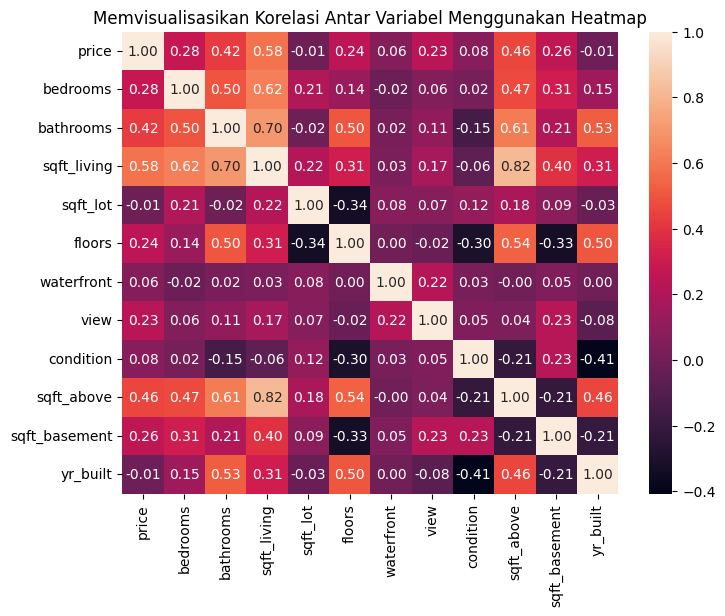

In [ ]:
plt.figure(figsize=(8,6))
korelasi = df.corr()
plt.title("Memvisualisasikan Korelasi Antar Variabel Menggunakan Heatmap")
sns.heatmap(korelasi,annot=True,fmt='.2f')

<p><b>3.Membuat Fungsi Untuk Mengecek Korelasi 1 Variabel Dengan Variabel Lainnya</b></p>

In [ ]:
df.columns

Index(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'sqft_above',
       'sqft_basement', 'yr_built'],
      dtype='object')

In [ ]:
def cek_korelasi(dataset=df,kolomDependen='price',arrKolomIndependent=['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'view', 'condition', 'sqft_above', 'yr_built']):
    for data in arrKolomIndependent:
        pearson_corr,p_value = stats.pearsonr(dataset[kolomDependen],dataset[data])
        
        if data == kolomDependen:
            print(f"Dataset Kolom '{kolomDependen}' Dan '{data}' Memiliki Korelasi Pearson Sempurna Di Karenakan Kedua Kolom Sama!")
            print("")
        elif pearson_corr > 0.7:
            print(f"Dataset Kolom '{kolomDependen}' Dan '{data}' Berkorelasi Positif Kuat Dengan Nilai Korelasi Pearson : {pearson_corr}")
            print("")
        elif pearson_corr > 0.5:
            print(f"Dataset Kolom '{kolomDependen}' Dan '{data}' Berkorelasi Positif Sedang Dengan Nilai Korelasi Pearson : {pearson_corr}")
            print("")
        elif pearson_corr > 0:
            print(f"Dataset Kolom '{kolomDependen}' Dan '{data}' Berkorelasi Positif Lemah Dengan Nilai Korelasi Pearson : {pearson_corr}")
            print("")
        elif pearson_corr == 0:
            print(f"Dataset Kolom '{kolomDependen}' Dan '{data}' Tidak Memilik Korelasi Dengan Nilai Korelasi Pearson : {pearson_corr}")
            print("")
        elif pearson_corr < 0:
            print(f"Dataset Kolom '{kolomDependen}' Dan '{data}' Berkorelasi Negatif Lemah Dengan Nilai Korelasi Pearson : {pearson_corr}")
            print("")
        elif pearson_corr < -0.5:
            print(f"Dataset Kolom '{kolomDependen}' Dan '{data}' Berkorelasi Negatif Sedang Dengan Nilai Korelasi Pearson : {pearson_corr}")
            print("")
        elif pearson_corr < -0.7:
            print(f"Dataset Kolom '{kolomDependen}' Dan '{data}' Berkorelasi Negatif Kuat Dengan Nilai Korelasi Pearson : {pearson_corr}")
            print("")

<p><b>4.Mengecek Korelasi Kolom 'price' dengan Semua Kolom Numeric</b></p>

In [ ]:
cek_korelasi(kolomDependen='price')

Dataset Kolom 'price' Dan 'price' Memiliki Korelasi Pearson Sempurna Di Karenakan Kedua Kolom Sama!

Dataset Kolom 'price' Dan 'bedrooms' Berkorelasi Positif Lemah Dengan Nilai Korelasi Pearson : 0.27872490759805857

Dataset Kolom 'price' Dan 'bathrooms' Berkorelasi Positif Lemah Dengan Nilai Korelasi Pearson : 0.42304359392189883

Dataset Kolom 'price' Dan 'sqft_living' Berkorelasi Positif Sedang Dengan Nilai Korelasi Pearson : 0.5829056400522058

Dataset Kolom 'price' Dan 'sqft_lot' Berkorelasi Negatif Lemah Dengan Nilai Korelasi Pearson : -0.01467190153145644

Dataset Kolom 'price' Dan 'view' Berkorelasi Positif Lemah Dengan Nilai Korelasi Pearson : 0.23305174946950158

Dataset Kolom 'price' Dan 'condition' Berkorelasi Positif Lemah Dengan Nilai Korelasi Pearson : 0.07585989990006198

Dataset Kolom 'price' Dan 'sqft_above' Berkorelasi Positif Lemah Dengan Nilai Korelasi Pearson : 0.4592556369590554

Dataset Kolom 'price' Dan 'yr_built' Berkorelasi Negatif Lemah Dengan Nilai Korelasi

<p><b>5.Mengecek Korelasi Kolom 'sqft_living' dengan Semua Kolom Numeric</b></p>

In [ ]:
cek_korelasi(kolomDependen='sqft_living')

Dataset Kolom 'sqft_living' Dan 'price' Berkorelasi Positif Sedang Dengan Nilai Korelasi Pearson : 0.5829056400522058

Dataset Kolom 'sqft_living' Dan 'bedrooms' Berkorelasi Positif Sedang Dengan Nilai Korelasi Pearson : 0.6248199352471271

Dataset Kolom 'sqft_living' Dan 'bathrooms' Berkorelasi Positif Sedang Dengan Nilai Korelasi Pearson : 0.6995149092997014

Dataset Kolom 'sqft_living' Dan 'sqft_living' Memiliki Korelasi Pearson Sempurna Di Karenakan Kedua Kolom Sama!

Dataset Kolom 'sqft_living' Dan 'sqft_lot' Berkorelasi Positif Lemah Dengan Nilai Korelasi Pearson : 0.2247366592072651

Dataset Kolom 'sqft_living' Dan 'view' Berkorelasi Positif Lemah Dengan Nilai Korelasi Pearson : 0.17280710986845718

Dataset Kolom 'sqft_living' Dan 'condition' Berkorelasi Negatif Lemah Dengan Nilai Korelasi Pearson : -0.06477799669857759

Dataset Kolom 'sqft_living' Dan 'sqft_above' Berkorelasi Positif Kuat Dengan Nilai Korelasi Pearson : 0.8151688147506351

Dataset Kolom 'sqft_living' Dan 'yr_bu

<p><b>6.Mengecek Korelasi Kolom 'price' dengan Kolom Square Feet Living,Lot,Dan Above</b></p>

In [ ]:
data = ['sqft_living','sqft_lot','sqft_above']
cek_korelasi(kolomDependen='price',arrKolomIndependent=data)

Dataset Kolom 'price' Dan 'sqft_living' Berkorelasi Positif Sedang Dengan Nilai Korelasi Pearson : 0.5829056400522058

Dataset Kolom 'price' Dan 'sqft_lot' Berkorelasi Negatif Lemah Dengan Nilai Korelasi Pearson : -0.01467190153145644

Dataset Kolom 'price' Dan 'sqft_above' Berkorelasi Positif Lemah Dengan Nilai Korelasi Pearson : 0.4592556369590554



<h3><b>REGRESI</b></h3>

<h4><b>LINEAR REGRESI DENGAN 1 VARIABEL BEBAS</b></h4>

<p><b>1.Mempersiapkan data (Mendeklarasikan Variabel Bebas dan Variabel Terikat)</b></p>

In [ ]:
X = df[['sqft_living']]
y = df['price']

<p><b>2.Membagi Data Menjadi 2 Yaitu Data Train dan Data Test</b></p>

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.25, random_state=110);

<p><b>3.Melihat Jumlah Data Train Dan Test</b></p>

In [ ]:
print("Jumlah Data X Train : ",X_train.shape)
print("Jumlah Data X Test : ",X_test.shape)
print("Jumlah Data y Train : ",y_train.shape)
print("Jumlah Data y Test : ",y_test.shape)

Jumlah Data X Train :  (2772, 1)
Jumlah Data X Test :  (924, 1)
Jumlah Data y Train :  (2772,)
Jumlah Data y Test :  (924,)


<p><b>4.Membuat Model Linear Regresi</b></p>

In [ ]:
linreg_model = LinearRegression()
linreg_model.fit(X_train,y_train)

LinearRegression()

<p><b>5.Menampikan Nilai Koefisien Dan Intercept</b></p>

In [ ]:
print("Nilai Koefisien : ",linreg_model.coef_)
print("Nilai Intercept : ",linreg_model.intercept_)

Nilai Koefisien :  [170.13551824]
Nilai Intercept :  142247.65993061557


<p><b>6.Memvisualisasi Linear Regresi Dengan Scatter Plot</b></p>

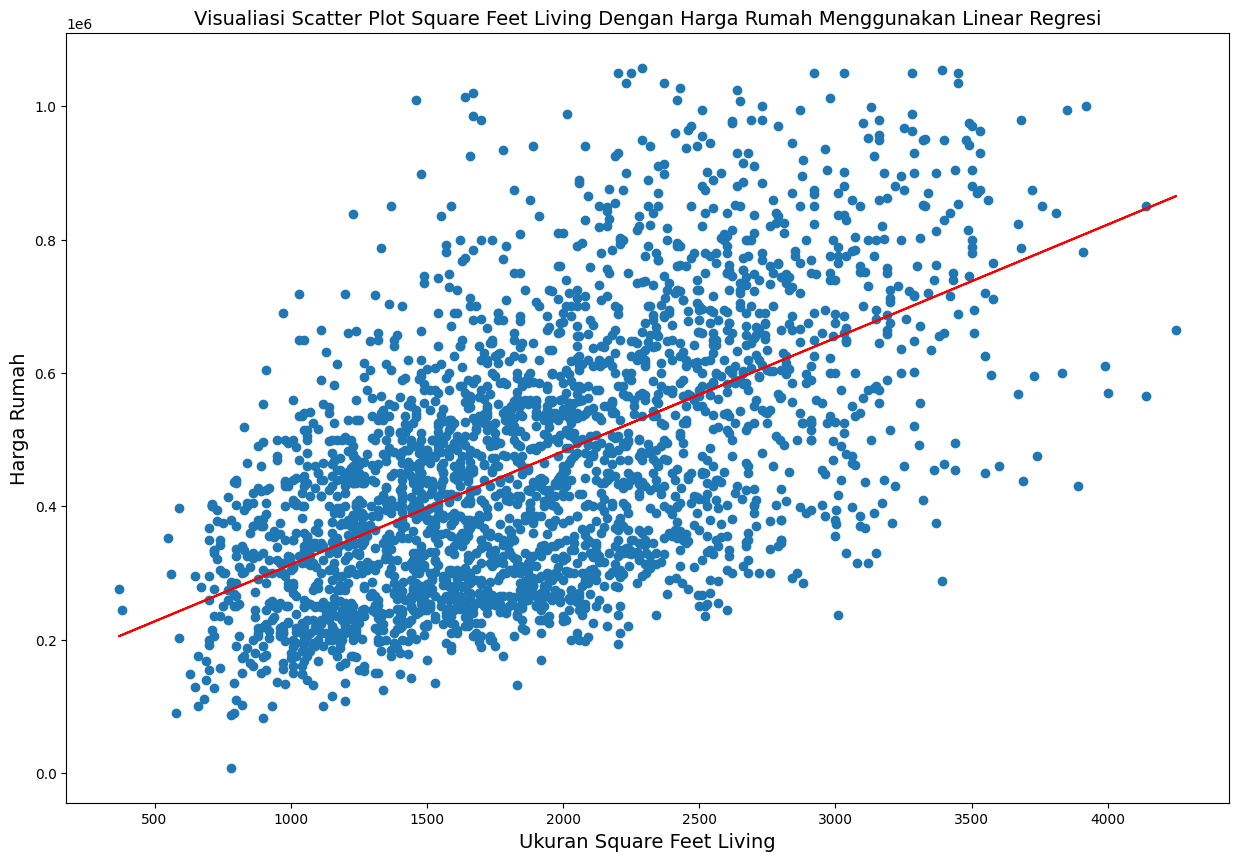

In [ ]:
fig,ax = plt.subplots(figsize=(15,10))
plt.scatter(X_train,y_train)
ax.plot(X_train, linreg_model.coef_[0]*X_train + linreg_model.intercept_, '-r')
plt.title("Visualiasi Scatter Plot Square Feet Living Dengan Harga Rumah Menggunakan Linear Regresi",fontsize="14")
plt.xlabel("Ukuran Square Feet Living",fontsize="14")
plt.ylabel("Harga Rumah",fontsize="14")
plt.show()

<p><b>7.Melakukan Prediksi Dari Model</b></p>

In [ ]:
y_pred = linreg_model.predict(X_test)

print("Data Harga Hasil Prediksi :",y_pred[0:10])
print("")
print("Data Harga Asli :",y_test[0:10])

Data Harga Hasil Prediksi : [535260.70707156 445088.88240286 397450.93729486 582898.65217955
 601613.55918626 280057.42970731 365125.18882873 281758.78488974
 552274.25889584 465505.144592  ]

Data Harga Asli : 2116    470000
940     310000
3281    736000
1372    368112
2594    550000
341     235000
1807    428000
2140    475000
3451    805000
352     235000
Name: price, dtype: int64


<p><b>8.Evaluasi Model</b></p>

In [ ]:
print("Root Mean Square Error (RMSE) : ",np.sqrt(mean_squared_error(np.array(y_test),y_pred)))
print("Mean Absolute Error (MAE): " ,mean_absolute_error(y_test,y_pred))
print("Mean Squared Error (MSE): " ,mean_squared_error(y_test,y_pred))

Root Mean Square Error (RMSE) :  158736.70694604042
Mean Absolute Error (MAE):  128449.92070514128
Mean Squared Error (MSE):  25197342132.073116


<h4><b>LINEAR REGRESI DENGAN 3 VARIABEL BEBAS</b></h4>

<p><b>1.Mempersiapkan data (Mendeklarasikan Variabel Bebas dan Variabel Terikat)</b></p>

In [ ]:
variabelBebas = ['bathrooms','sqft_above','sqft_living']
X = df[variabelBebas]
y = df['price']

<p><b>2.Membagi Data Menjadi 2 Yaitu Data Train dan Data Test</b></p>

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.30, random_state=100);

<p><b>3.Melihat Jumlah Data Train Dan Test</b></p>

In [ ]:
print("Jumlah Data X Train : ",X_train.shape)
print("Jumlah Data X Test : ",X_test.shape)
print("Jumlah Data y Train : ",y_train.shape)
print("Jumlah Data y Test : ",y_test.shape)

Jumlah Data X Train :  (2587, 3)
Jumlah Data X Test :  (1109, 3)
Jumlah Data y Train :  (2587,)
Jumlah Data y Test :  (1109,)


<p><b>4.Membuat Model Linear Regresi</b></p>

In [ ]:
linreg_model = LinearRegression()
linreg_model.fit(X_train,y_train)

LinearRegression()

<p><b>5.Menampikan Nilai Koefisien Dan Intercept</b></p>

In [ ]:
print("Nilai Koefisien : ",linreg_model.coef_)
print("Nilai Intercept : ",linreg_model.intercept_)

Nilai Koefisien :  [8278.70910269  -18.36867491  180.38856428]
Nilai Intercept :  137145.82853314502


<p><b>6.Memvisualisasi Linear Regresi Dengan Scatter Plot</b></p>

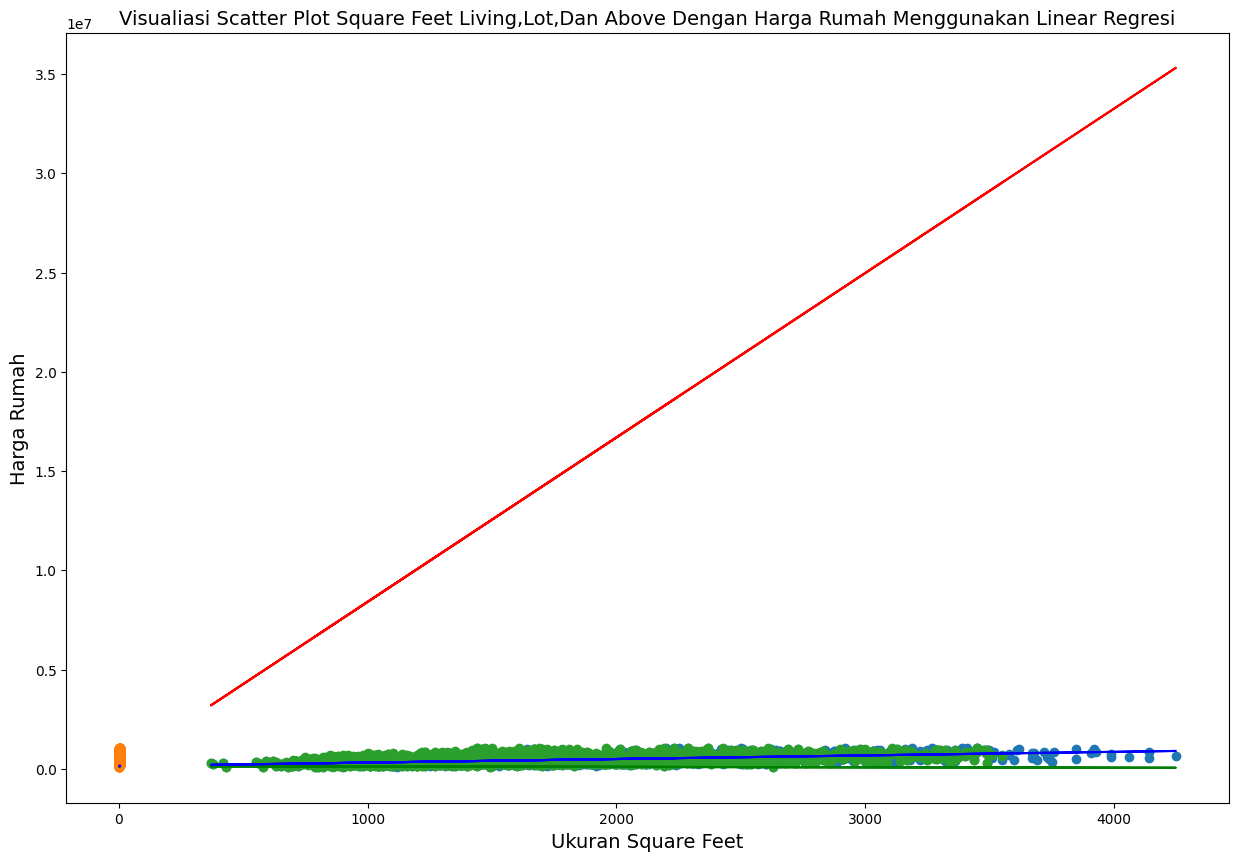

In [ ]:
fig,ax = plt.subplots(figsize=(15,10))
plt.scatter(X_train['sqft_living'],y_train)
plt.scatter(X_train['bathrooms'],y_train)
plt.scatter(X_train['sqft_above'],y_train)
ax.plot(X_train, linreg_model.coef_[0]*X_train + linreg_model.intercept_, '-r')
ax.plot(X_train, linreg_model.coef_[1]*X_train + linreg_model.intercept_, '-g')
ax.plot(X_train, linreg_model.coef_[2]*X_train + linreg_model.intercept_, '-b')
plt
plt.title("Visualiasi Scatter Plot Square Feet Living,Lot,Dan Above Dengan Harga Rumah Menggunakan Linear Regresi",fontsize="14")
plt.xlabel("Ukuran Square Feet",fontsize="14")
plt.ylabel("Harga Rumah",fontsize="14")
plt.show()

<p><b>7.Melakukan Prediksi Dari Model</b></p>

In [ ]:
y_pred = linreg_model.predict(X_test)

print("Data Harga Hasil Prediksi :",y_pred[0:5])
print("")
print("Data Harga Asli :",y_test[0:5])

Data Harga Hasil Prediksi : [371980.61899928 411314.8708289  338878.21177304 364778.58129507
 525006.1530392 ]

Data Harga Asli : 1587    399500
3105    670500
2105    468000
2857    605000
1611    400000
Name: price, dtype: int64


<p><b>8.Evaluasi Model</b></p>

In [ ]:
print("Root Mean Square Error (RMSE) : ",np.sqrt(mean_squared_error(np.array(y_test),y_pred)))
print("Mean Absolute Error (MAE): " ,mean_absolute_error(y_test,y_pred))
print("Mean Squared Error (MSE): " ,mean_squared_error(y_test,y_pred))

Root Mean Square Error (RMSE) :  159365.1530340715
Mean Absolute Error (MAE):  128877.62162363082
Mean Squared Error (MSE):  25397252001.573025
